In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict
import matplotlib.pyplot as plt
import os
os.chdir(os.getcwd() + '/..')

from data import read_texts
from lm import *

plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 3})
plt.rcParams.update({'lines.markersize': 10})

In [2]:
DNAMES = ["brown", "reuters", "gutenberg"]
data = {}
for dname in DNAMES:
  data[dname] = read_texts("data/corpora.tar.gz", dname)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [3]:
ppls = 0
for dname in DNAMES:
  print(f'{dname}...')
  model = NgramUnk(2, .01, 0.08)
  model.fit_corpus(data[dname].train)
  ppls += model.perplexity(data[dname].dev)
ppls / 3

brown...
reuters...
gutenberg...


599.8775579169156

In [4]:
ngram_counts = sorted(model.ngram_count.values(), reverse=True)
len(model.context_count)
print(model.context_count)
# model.V

{('START_OF_SENTENCE',): 68767, ('CHAPTER',): 216, ('Emma',): 612, ('Woodhouse',): 220, ('handsome',): 91, ('clever',): 54, ('and',): 55265, ('rich',): 162, ('with',): 11736, ('comfortable',): 76, ('home',): 465, ('happy',): 383, ('disposition',): 54, ('seemed',): 760, ('to',): 32519, ('<UNK>',): 172754, ('some',): 1848, ('of',): 48920, ('the',): 87971, ('best',): 401, ('existence',): 38, ('had',): 7103, ('lived',): 186, ('nearly',): 96, ('twenty',): 322, ('one',): 4021, ('years',): 693, ('in',): 22575, ('world',): 852, ('very',): 2703, ('little',): 1955, ('distress',): 67, ('or',): 4052, ('her',): 7773, ('She',): 1145, ('was',): 12981, ('youngest',): 33, ('two',): 1534, ('daughters',): 228, ('most',): 1028, ('affectionate',): 39, ('father',): 1182, ('consequence',): 80, ('sister',): 403, ('marriage',): 98, ('been',): 2367, ('mistress',): 93, ('his',): 14432, ('house',): 1976, ('from',): 6011, ('early',): 199, ('period',): 47, ('Her',): 268, ('mother',): 773, ('died',): 218, ('too',): 

In [5]:
ngram_counts_dic = {}
for ngram, cnt in model.ngram_count.items():
  ngram_counts_dic[cnt] = ngram_counts_dic.get(cnt, []) + [ngram]
ngram_counts_dic

{205: [('START_OF_SENTENCE', 'CHAPTER'), ('<UNK>', 'us'), ('thou', 'art')],
 31: [('CHAPTER', 'END_OF_SENTENCE'),
  ('to', 'hold'),
  ('disposed', 'to'),
  ('the', 'horses'),
  ('and', 'where'),
  ('sure', 'he'),
  ('her', 'so'),
  ('we', 'could'),
  ('START_OF_SENTENCE', 'dare'),
  ('had', 'received'),
  ('was', 'rather'),
  ('Mr', 'Frank'),
  ('father', 'to'),
  ('and', 'Harriet'),
  ('read', 'the'),
  ('can', 'have'),
  ('have', 'nothing'),
  ('either', 'of'),
  ('was', 'for'),
  ('and', 'perhaps'),
  ('<UNK>', 'yourself'),
  ('Very', 'well'),
  ('With', 'all'),
  ('<UNK>', 'friend'),
  ('but', 'had'),
  ('can', 'it'),
  ('Here', 'is'),
  ('or', 'rather'),
  ('them', 'again'),
  ('happy', 'to'),
  ('run', 'away'),
  ('quarter', 'of'),
  ('of', 'something'),
  ('young', 'and'),
  ('till', 'they'),
  ('be', 'known'),
  ('but', 'then'),
  ('listen', 'to'),
  ('about', 'that'),
  ('that', 'what'),
  ('go', 'back'),
  ('die', 'and'),
  ('garden', 'and'),
  ('in', 'with'),
  ('but', 'all'

In [6]:
{cnts: len(ngrams) for cnts, ngrams in ngram_counts_dic.items()}

{205: 3,
 31: 193,
 165: 8,
 3: 16190,
 1: 141956,
 5: 6393,
 8: 2864,
 2: 34819,
 56: 58,
 26: 280,
 287: 1,
 3937: 1,
 151: 3,
 178: 7,
 13207: 1,
 194: 9,
 74: 37,
 10227: 1,
 4: 9741,
 166: 11,
 11: 1581,
 34: 164,
 7003: 1,
 591: 1,
 41: 114,
 63: 53,
 20: 516,
 881: 1,
 831: 1,
 384: 1,
 997: 1,
 189: 2,
 584: 1,
 22: 409,
 272: 2,
 16: 756,
 44: 135,
 13: 1140,
 55: 74,
 10: 1895,
 21: 489,
 767: 1,
 131: 17,
 15: 869,
 1904: 1,
 140: 18,
 19: 585,
 198: 5,
 18: 619,
 28: 271,
 274: 3,
 203: 4,
 481: 2,
 388: 2,
 14: 1033,
 1255: 1,
 37: 157,
 1023: 1,
 14239: 1,
 311: 1,
 866: 1,
 465: 2,
 1241: 1,
 38: 152,
 45: 96,
 799: 1,
 464: 1,
 253: 5,
 27: 300,
 7902: 1,
 23306: 1,
 1537: 1,
 1421: 1,
 39: 118,
 12: 1272,
 35: 151,
 19427: 1,
 6: 4682,
 7614: 1,
 6867: 1,
 7: 3587,
 119: 16,
 301: 2,
 4410: 1,
 49: 73,
 48: 86,
 410: 1,
 30: 222,
 549: 1,
 9: 2272,
 92: 20,
 36: 164,
 516: 3,
 136: 10,
 72: 35,
 2806: 1,
 51: 82,
 62: 63,
 180: 4,
 68: 33,
 71: 42,
 53: 56,
 111: 20,
 

In [7]:
ngram_counts_dic[37253]

KeyError: 37253

In [ ]:
plt.plot(ngram_counts[:10000])
plt.yscale('log')

# No UNKs

In [8]:
def no_unks_plot(fs):
  import pandas as pd
  import seaborn as sns
  plt.rcParams['font.size'] = 20
#   plt.rcParams['axes.titlesize'] = 21
  plt.rcParams['axes.labelsize'] = 21
  plt.rcParams['xtick.labelsize'] = 21
  plt.rcParams['ytick.labelsize'] = 21
  plt.rcParams['figure.figsize'] = 10, 11
  
  for f in fs:
    df = pd.read_csv(f'results/tuner/{f}/results.csv')
    m = df.set_index(['λ'])['avg']
    sns.lineplot(x='λ', y='avg', data=df, marker='o', label=f[:3])
  plt.title('Average In-Domain PPL (NO-UNKs)')
  plt.ylabel('avg PPL')
  plt.legend()
  plt.xscale('log')

<AxesSubplot:xlabel='n', ylabel='λ'>

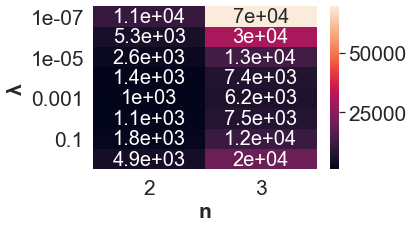

In [97]:
f1 = 'n=2__26994587'
df1 = pd.read_csv(f'results/tuner/{f1}/results.csv')
f2 = 'n=3__nounk__1619758079'
df2 = pd.read_csv(f'results/tuner/{f2}/results.csv')
X = pd.concat([df1, df2])

m = X.set_index(['λ', 'n'])['avg'].unstack()
sns.heatmap(m, annot=True)

In [181]:
def no_unks_heatmap(fs, outfile):
  import pandas as pd
  import seaborn as sns
  plt.rcParams['font.size'] = 21
#   plt.rcParams['axes.titlesize'] = 21
  plt.rcParams['axes.labelsize'] = 21
  plt.rcParams['xtick.labelsize'] = 21
  plt.rcParams['ytick.labelsize'] = 21
  plt.rcParams['figure.figsize'] = 7, 10
  
  df = pd.DataFrame()
  for f in fs:
    df = pd.concat([df, pd.read_csv(f'results/tuner/{f}/results.csv')])
  
  # add unigram
  df_uni = pd.DataFrame({
    'n': [1] * 8,
    'λ': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
    'brown': [None] * 8,
    'reuters': [None] * 8,
    'gutenberg': [None] * 8,
    'avg': [1459.6637431151537] * 8  
  })
  df = pd.concat([df, df_uni])

  m = df.set_index(['λ', 'n'])['avg'].unstack()
  sns.heatmap(m, annot=True, fmt='.0f', cmap='viridis_r')
  plt.title('Avg In-Domain dev PPL (NO-UNKs)')
  plt.tight_layout()
  plt.savefig(f'report/figures/{outfile}', dpi=100)

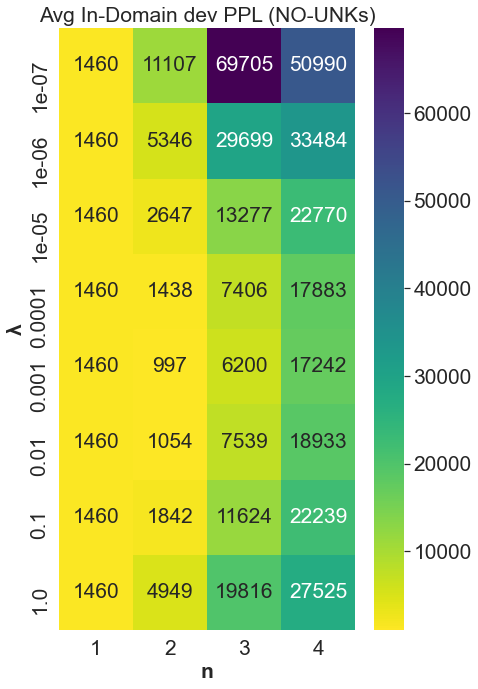

In [201]:
fs = ['n=2__26994587', 'n=3__nounk__1619758079', 'n=4__nounk__1619758083']
no_unks_heatmap(fs, 'nounks.png')

# UNKs

In [157]:
def unks_plot(f, title, outfile):
  import seaborn as sns
  import pandas as pd
  plt.rcParams['font.size'] = 20
  plt.rcParams['axes.labelsize'] = 21
  plt.rcParams['xtick.labelsize'] = 21
  plt.rcParams['ytick.labelsize'] = 21
  plt.rcParams['figure.figsize'] = 11, 11
  
  df = pd.read_csv(f'results/tuner/{f}/results.csv')
  m = df.set_index(['voc_ratio', 'λ'])['avg'].unstack()
  sns.heatmap(m, annot=True, fmt='.0f', cmap='viridis_r')
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig(f'report/figures/{outfile}', dpi=100)

# N=2

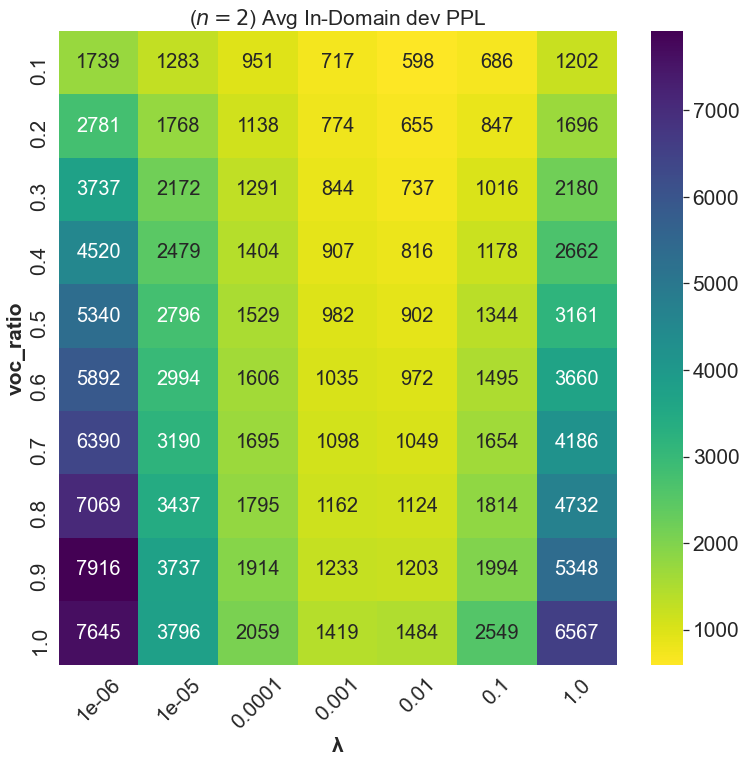

In [158]:
unks_plot('n=2__voc=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0__1619748147', '($n=2$) Avg In-Domain dev PPL', 'n=2.png')

In [159]:
# unks_plot('n=2__voc=0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12__1619750612', '($n=2$) Avg In-Domain dev PPL'))

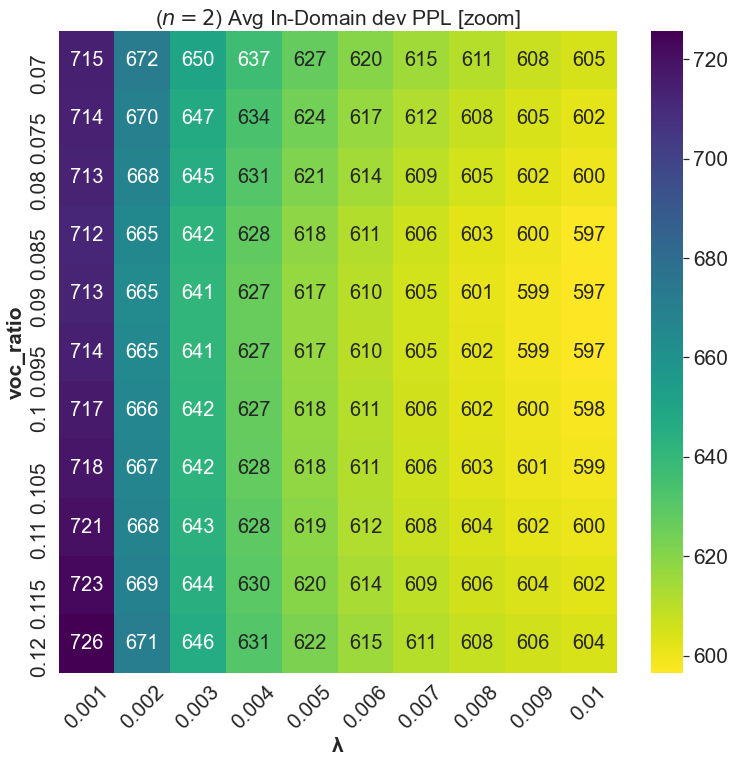

In [160]:
unks_plot('n=2__voc=0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12__1619761719', '($n=2$) Avg In-Domain dev PPL [zoom]', 'n=2_zoom.png')

# N = 3

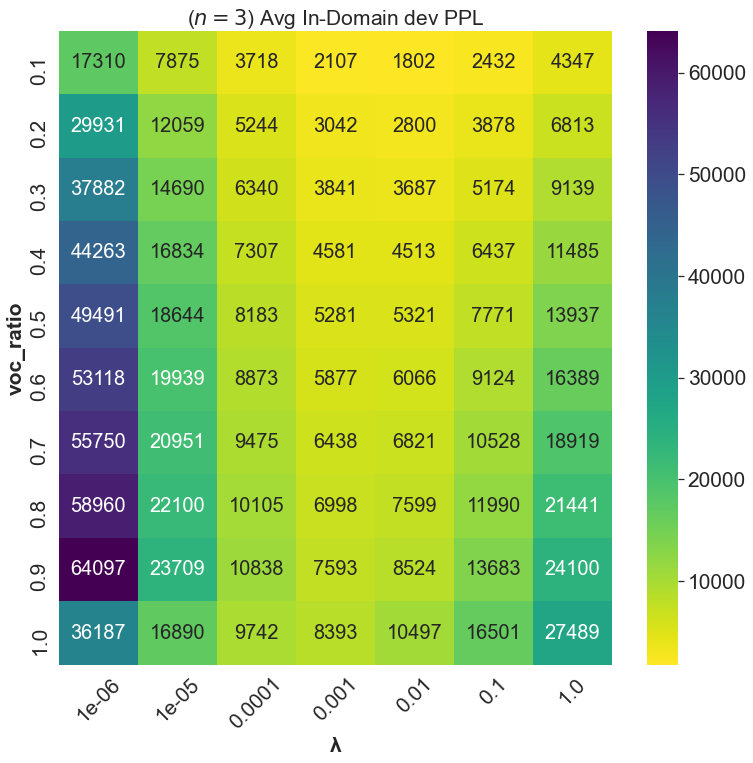

In [161]:
unks_plot('n=3__voc=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0__1619748178', '($n=3$) Avg In-Domain dev PPL', 'n=3.png')

In [162]:
# unks_plot('n=3__voc=0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01__1619758864', '($n=3$) Avg In-Domain dev PPL'))

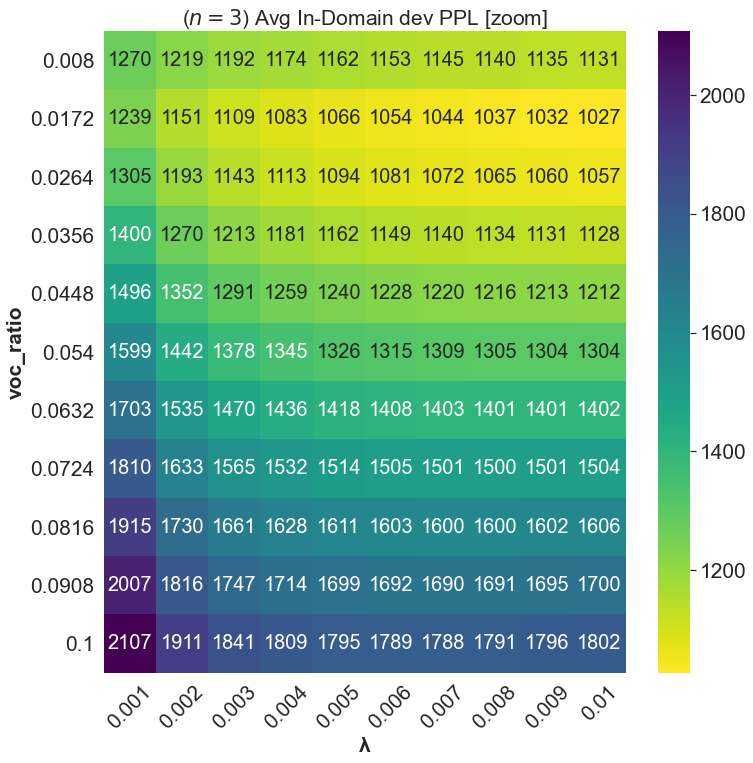

In [163]:
unks_plot('n=3__voc=0.008,0.0172,0.0264,0.0356,0.0448,0.054,0.0632,0.0724,0.0816,0.0908,0.1__1619761851', '($n=3$) Avg In-Domain dev PPL [zoom]', 'n=3_zoom.png')

# N = 4

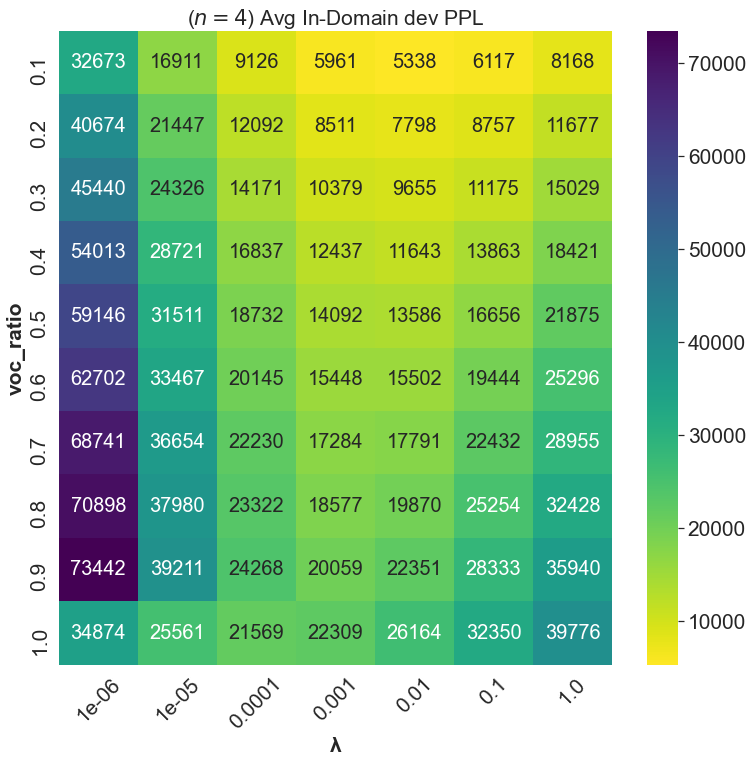

In [164]:
unks_plot('n=4__voc=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0__1619748225', '($n=4$) Avg In-Domain dev PPL', 'n=4.png')

In [165]:
# unks_plot('n=4__voc=0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12__1619756823', '($n=4$) Avg In-Domain dev PPL')

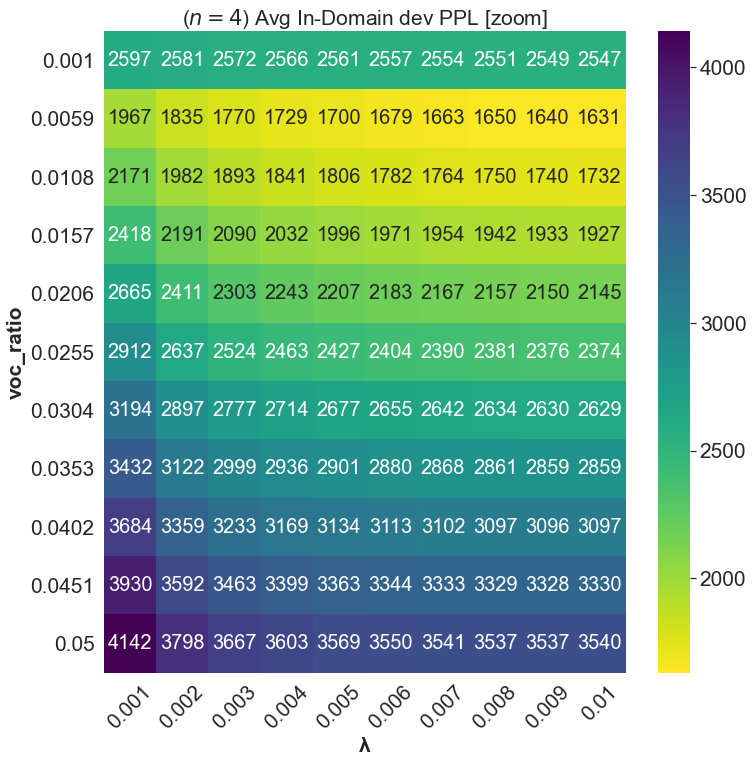

In [166]:
unks_plot('n=4__voc=0.001,0.0059,0.0108,0.0157,0.0206,0.0255,0.0304,0.0353,0.0402,0.0451,0.05__1619761979', '($n=4$) Avg In-Domain dev PPL [zoom]', 'n=4_zoom.png')

# Cross-Domain Best

In [193]:
def cross_ppl_heatmap(f, eval_type, outfile, title):
  import seaborn as sns
  import pandas as pd
  plt.rcParams['font.size'] = 20
  plt.rcParams['axes.labelsize'] = 21
  plt.rcParams['axes.titlesize'] = 21
  plt.rcParams['axes.labelweight'] = 'bold'
  plt.rcParams['xtick.labelsize'] = 21
  plt.rcParams['ytick.labelsize'] = 21
  plt.rcParams['figure.figsize'] = 5,3
  
  
  df = pd.read_csv(f'results/{f}/table-{eval_type}.csv')
  
  df.columns = ['train', f'eval={eval_type}', 'ppl']
  
  df = df.set_index(['train', f'eval={eval_type}'])['ppl'].unstack()
  sns.heatmap(df, annot=True, fmt='.0f', cmap='viridis_r', vmin=350, vmax=10000)
  plt.xticks(rotation=20)
#   plt.tight_layout()
  plt.title(title)
  plt.savefig(f'report/figures/{outfile}', bbox_inches = "tight", dpi=150)

# Best n=2

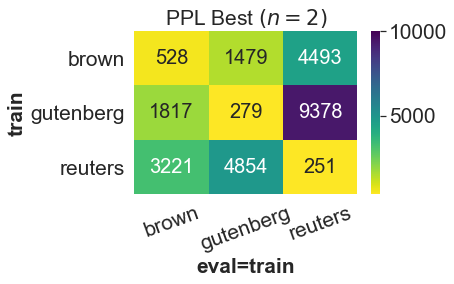

In [194]:
title = 'PPL Best $(n=2)$'
cross_ppl_heatmap('ngram_n=2_l=0.01_voc=0.09', 'train', 'bigram_cross_ppl_train.png', title)

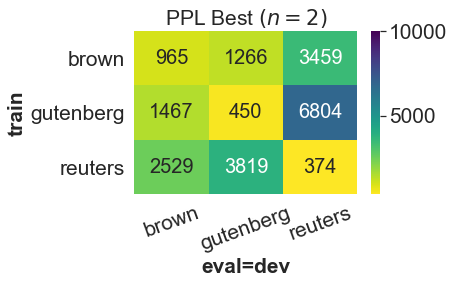

In [195]:
title = 'PPL Best $(n=2)$'
cross_ppl_heatmap('ngram_n=2_l=0.01_voc=0.09', 'dev', 'bigram_cross_ppl_dev.png', title)

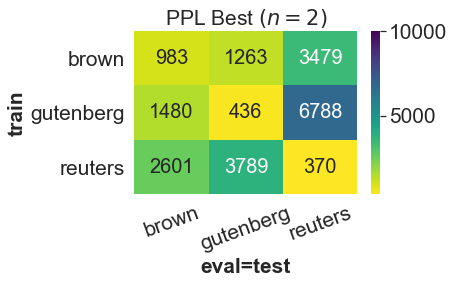

In [196]:
title = 'PPL Best $(n=2)$'
cross_ppl_heatmap('ngram_n=2_l=0.01_voc=0.09', 'test', 'bigram_cross_ppl_test.png', title)

# Unigram

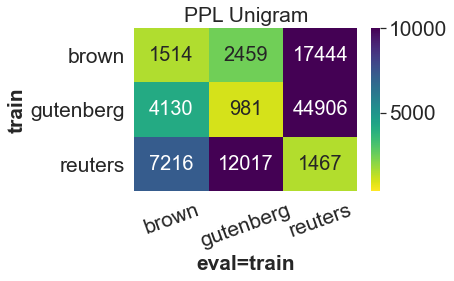

In [197]:
title = 'PPL Unigram'
cross_ppl_heatmap('unigram', 'train', 'unigram_cross_ppl_train.png', title)

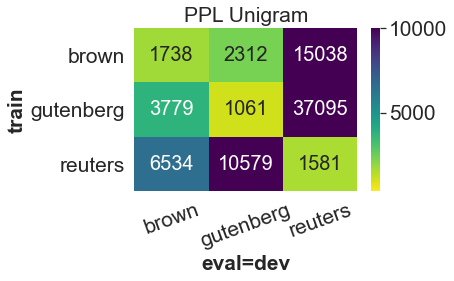

In [198]:
title = 'PPL Unigram'
cross_ppl_heatmap('unigram', 'dev', 'unigram_cross_ppl_dev.png', title)

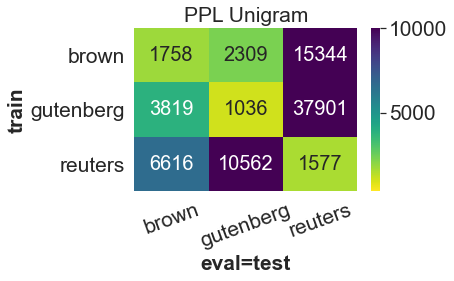

In [199]:
title = 'PPL Unigram'
cross_ppl_heatmap('unigram', 'test', 'unigram_cross_ppl_test.png', title)

In [200]:
plt.rcParams["savefig.dpi"]

'figure'